# Chapter 8 : Vapour Power Systems:Reheat Cycle


* Evaluating Performance of the Reheat Cycle 8.3,8.4

* Determining Optimum Reheat Pressure in the Reheat Cycle

## Evaluating Performance of the Reheat Cycle

### 1 Example 8.3:  Evaluating Performance of an Ideal Reheat Cycle(449-451)

Steam is the working fluid in an ideal Rankine cycle with `superheat` and `reheat`. 

Steam enters the first-stage turbine at 8.0 MPa, 4808C, and expands to 0.7 MPa. It is then reheated to 4408C before entering the second-stage turbine, where it expands to the condenser pressure of 0.008 MPa. The net power output is 100 MW. 

#### Determine

* (a) the thermal efficiency of the cycle, 

* (b) the mass flow rate of steam, in $kg/h$, 

* (c) the rate of heat transfer $Q_{out}$  from the condensing steam as it passes through the condenser, in $MW$. Discuss the effects of reheat on the vapor power cycle.

#### SOLUTION

**Known**: An ideal reheat cycle operates with steam as the working fluid. Operating pressures and temperatures are specified, and the net power output is given.

**Find:** Determine the thermal efficiency, the mass flow rate of the steam, in $kg/h$

Engineering Model:
1. Each component in the cycle is analyzed as a control volume at steady state. The control volumes are shown on the accompanying sketch by dashed lines.

2. All processes of the working fluid are internally reversible.

3. The turbine and pump operate adiabatically.

4. Condensate exits the condenser as saturated liquid.

5. Kinetic and potential energy effects are negligible.

![Rankine83](./img/rankine83.png) 

### 2 Example 8.4: Evaluating Performance of a Reheat Cycle with Turbine Irreversibility Page451

Reconsider the reheat cycle of Example 8.3, but include in the analysis that each turbine stage has the same isentropic efficiency. 

(a) If $\eta_t=85$%, determine the thermal efficiency. 

(b) Plot the thermal efficiency versus turbine stage isentropic efficiency ranging from 85 to 100%.

![rankine84](./img/rankine84a.png)

### SOLUTION

* **Known:** A reheat cycle operates with steam as the working fluid. Operating pressures and temperatures are specified. Each turbine stage has the same isentropic efficiency.

* **Find:**
  
  * If $\eta_t=85$%, determine the thermal efficiency.

  * plot the thermal efficiency versus turbine stage isentropic efficiency ranging from 85 to 100%.
  
### Engineering Model:

1. As in Example 8.3, each component is analyzed as a control volume at steady state.

2. Except for the two turbine stages, all processes are internally reversible.

3. The turbine and pump operate adiabatically.

4. The condensate exits the condenser as saturated liquid.

5. Kinetic and potential energy effects are negligible.  


In [17]:
from seuif97 import *

# Fix the states

# Given :-
# Part (a)
etat = 0.85 # given efficiency
# the following specific enthalpy values are known, in kJ/kg
t1=480
p1=8
h1 =pt2h(p1,t1)
s1=pt2s(p1,t1)

p2=0.7
s2=s1
h2s =ps2h(p2,s2)
etat1=0.85
h2=h1-etat1*(h1-h2s)
 
t3=440
p3=p2
h3 =pt2h(p3,t3)
s3 =pt2s(p3,t3)

p4=0.008
s4=s3
h4s =ps2h(p4,s4)

etat2=etat1
h4=h3-etat2*(h3-h4s)

p5=p4
h5=px2h(p5,0)
v5=px2v(p5,0)

p6=p1
h6=h5+v5*(p6-p5)*100

# Calculations
# The specific enthalpy at the exit of the second-stage turbine in kj/kg
eta = ((h1-h2)+(h3-h4)-(h6-h5))/((h1-h6)+(h3-h2)) 

# Result
print('The thermal efficiency is:  ',eta)


The thermal efficiency is:   0.3521833715191451


###  Turbine isentropic efficiency  &  cycle thermal efficiency

#### Sweep eta from `0.85` to `1.0` in steps of `0.01`,then, using the  matplotlib.pyplot

In [1]:
from seuif97 import *

def ReheatCycle(p2,p1,t1,t3,p4,eta):
    h1 =pt2h(p1,t1)
    s1=pt2s(p1,t1)

    s2=s1
    h2s =ps2h(p2,s2)
    etat1=eta
    h2=h1-etat1*(h1-h2s)
  
    p3=p2
    h3 =pt2h(p3,t3)
    s3 =pt2s(p3,t3)

    s4=s3
    h4s =ps2h(p4,s4)

    etat2=etat1
    h4=h3-etat2*(h3-h4s)

    p5=p4
    h5=px2h(p5,0)
    v5=px2v(p5,0)

    p6=p1
    h6=h5+v5*(p6-p5)*100

    eta = ((h1-h2)+(h3-h4)-(h6-h5))/((h1-h6)+(h3-h2)) 
    return eta 

In [2]:
t1=480
p1=8
p2=0.7
t3=440
p4=0.008
eta=1.0
print(ReheatCycle(p2,p1,t1,t3,p4,eta))
p2=0.7
eta=0.85
print(ReheatCycle(p2,p1,t1,t3,p4,eta))

0.4044083836818937
0.3521833715191451


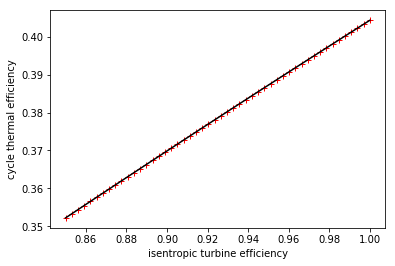

In [25]:
%matplotlib inline

# Part (b)
from numpy import linspace
import matplotlib.pyplot as plt

y  = []
t1=480
p1=8
p2=0.7
t3=440
p4=0.008
etaxList = linspace(0.85,1,50)
for etax in etaxList:
    yi=ReheatCycle(p2,p1,t1,t3,p4,etax)
    y.append(yi)

plt.plot(etaxList,y,'r+',etaxList,y,'k')
plt.xlabel('isentropic turbine efficiency')
plt.ylabel('cycle thermal efficiency')
plt.show()

From the Fig, we see that the cycle thermal efficiency increases from `0.351`
to` 0.403` as turbine stage isentropic efficiency increases from `0.85` to `1.00`

`Turbine isentropic efficiency` is seen to have a significant effect on `cycle thermal efficiency.`

## Determining Optimum Reheat Pressure in the Simple Reheat Cycle

#### 17 KNAPSACK AND GRAPH OPTIMIZATION PROBLEMS

The notion of an optimization problem provides a structured way to think about solving lots of computational problems. Whenever you set about solving a problem that involves finding the biggest, the smallest, the most, the fewest, the fastest, the least expensive, etc., there is a good chance that you can map the problem onto a classic optimization problem for which there is a known computational solution.

In general, an optimization problem has two parts:

* 1 `An objective function` that is to be maximized or minimized. For example, the airfare between Boston and Istanbul.

* 2 `A set of constraints` (possibly empty) that must be honored. For example, an upper bound on the travel time.

`Exhaustive enumeration` algorithms provide a simple, but often computationally intractable, way to search for optimal solutions

[3 SOME SIMPLE NUMERICAL PROGRAMS](./03_SOME_SIMPLE_NUMERICAL_PROGRAMS.ipynb)

**3.1 Exhaustive Enumeration**

We `enumerate` all possibilities until we get to the right answer or exhaust `the space of possibilities`.

Even if millions of guesses are required, it’s not usually a problem. Modern computers are `amazingly fast`.

#### The Problem of Optimum Reheat Pressure in the Simple Reheat Cycle can be formalized as follows:

Find a $p_{rh}$ that maximizes the objective function

$maximization_{p_{rh}} f(p_{rh}) $


subject to the constraint that

$ p_{out}<p_{rh}<p_{in}$

where:

$f(p_{rh})$:  the function of the Simple Reheat Cycle  thermal efficiency

$p_{rh}$: Reheat Pressure

$p_{in}$: Inlet Pressure of Turbine

$p_{out}$: outlet Pressure of Turbine


### 1 Rankine8.3

The Optimum Reheat Pressure: 1.3838MPa
The cycle thermal efficiency: 35.3946%


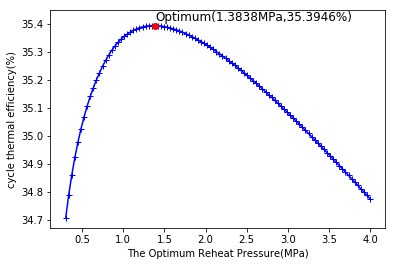

In [3]:
%matplotlib inline

from numpy import linspace
import matplotlib.pyplot as plt

ef  = []
# constrain
#p2list = linspace(0.008,8,1000)
p2list = linspace(0.3,4,100)

t1=480
p1=8
t3=440
p4=0.008
eta=0.85

maxEta=0;
OptiP=0.3
for p2 in p2list:
    ceta = 100.0*ReheatCycle(p2,p1,t1,t3,p4,eta) 
    if ceta>maxEta:
        maxEta=ceta
        OptiP=p2
    ef.append(ceta)

print("The Optimum Reheat Pressure: {:.4f}MPa".format(OptiP)) 
print("The cycle thermal efficiency: {:.4f}%".format(maxEta)) 

plt.xlabel('The Optimum Reheat Pressure(MPa)')
plt.ylabel('cycle thermal efficiency(%)')

plt.plot(p2list,ef,'b+-')
plt.plot(OptiP,maxEta,'ro')
plt.annotate('Optimum({:.4f}MPa,{:.4f}%)'.format(OptiP,maxEta),
             xy=(OptiP, maxEta), xycoords='data',
             xytext=(+0.1, +5), textcoords='offset points', fontsize=12)
y0, y1 = plt.ylim()
plt.ylim(y0,y1+0.02)
plt.show()

### 2  郑体宽，杨晨. 热力发电厂（第二版）[77-78页]

郑体宽，杨晨. 热力发电厂（第二版）[77-78页] ,中国电力出版社，北京，2008.12

【例题2-1】 某凝汽式汽轮机的蒸汽参数为：$p_o=13.25MPa$,$t_o=550°C$,$p_c=0.005MPa$。拟采用一次中间再热，$t_{rh}=550°C$。求该理想再热循环的最佳再热压力及循环效率。

思考：书中的方法是不是 [computational thinking](https://en.wikipedia.org/wiki/Computational_thinking#Center_for_Computational_Thinking)的方法？ 

In [27]:
t1=550
p1=13.25
p2=0.3
t3=550
p4=0.005
eta=1.0
print(ReheatCycle(p2,p1,t1,t3,p4,eta))

0.4393276723655848


The Optimum Reheat Pressure: 2.7685MPa
The cycle Thermal Efficiency: 45.4701%


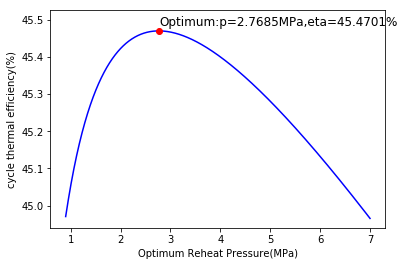

In [4]:
%matplotlib inline

from numpy import linspace
import matplotlib.pyplot as plt

ef  = []
t1=550
p1=13.25
t3=550
p4=0.005
eta=1.0
#constraint
#p2list = linspace(0.005,13.25,10000)
p2list = linspace(0.9,7.0,1000)

maxEta=0;
OptiP=0.1
for p2 in p2list:
    ceta = 100.0*ReheatCycle(p2,p1,t1,t3,p4,eta) 
    if ceta>maxEta:
        maxEta=ceta
        OptiP=p2
    ef.append(ceta)

print("The Optimum Reheat Pressure: {:.4f}MPa".format(OptiP)) 
print("The cycle Thermal Efficiency: {:.4f}%".format(maxEta)) 


plt.xlabel('Optimum Reheat Pressure(MPa)')
plt.ylabel('cycle thermal efficiency(%)')

plt.plot(p2list,ef,'b-')
plt.plot(OptiP,maxEta,'ro')

plt.annotate('Optimum:p={:.4f}MPa,eta={:.4f}%'.format(OptiP,maxEta),
             xy=(OptiP, maxEta), xycoords='data',
             xytext=(+0.1, +5), textcoords='offset points', fontsize=12)
plt.ylim(plt.ylim()[0],plt.ylim()[1]+0.03)
plt.show()